In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model, load_model

class ConvolutionalAutoencoder:
    def __init__(self):
        self.encoder_model = None
        self.model = None
        return
    
    def build(self, input_dims, opt):
        input_layer = Input(shape=input_dims)
        
        conv_one = Conv2D(64, (3,3), activation='relu', padding='same') (input_layer)
        conv_two = Conv2D(64, (3,3), activation='relu', padding='same') (input_layer)
        pool_one = MaxPooling2D((2,2), padding='same') (conv_two)
        
        conv_three = Conv2D(32, (3,3), activation='relu', padding='same') (pool_one)
        conv_four = Conv2D(32, (3,3), activation='relu', padding='same') (conv_three)
        pool_two = MaxPooling2D((2,2), padding='same') (conv_four)
        
        conv_five = Conv2D(16, (3,3), activation='relu', padding='same') (pool_two)
        conv_six = Conv2D(16, (3,3), activation='relu', padding='same') (conv_five)
        pool_three = MaxPooling2D((2,2), padding='same') (conv_six)
        
        encoder_output = Flatten() (pool_three)
        self.encoder_model = Model(input_layer, encoder_output)
        
        conv_seven = Conv2D(16, (3,3), activation='relu', padding='same') (pool_three)
        conv_eight = Conv2D(16, (3,3), activation='relu', padding='same') (conv_seven)
        upsamp_one = UpSampling2D((2,2)) (conv_eight)
        
        conv_nine = Conv2D(32, (3,3), activation='relu', padding='same') (upsamp_one)
        conv_ten = Conv2D(32, (3,3), activation='relu', padding='same') (conv_nine)
        upsamp_two = UpSampling2D((2,2)) (conv_ten)
        
        conv_eleven = Conv2D(64, (3,3), activation='relu', padding='same') (upsamp_two)
        conv_twelve = Conv2D(64, (3,3), activation='relu', padding='same') (conv_eleven)
        upsamp_three = UpSampling2D((2,2)) (conv_twelve)
        decoder_output = Conv2D(3, (3,3), activation='sigmoid', padding='same') (upsamp_three)
        
        self.model = Model(input_layer, decoder_output)
        self.model.compile(optimizer=opt, loss='binary_crossentropy')
        
        '''
        conv_one = Conv2D(16, (3,3), activation='relu', padding='same') (input_layer)
        pool_one = MaxPooling2D((2,2), padding='same') (conv_one)
        conv_two = Conv2D(8, (3,3), activation='relu', padding='same') (pool_one)
        pool_two = MaxPooling2D((2,2), padding='same') (conv_two)
        conv_three = Conv2D(8, (3,3), activation='relu', padding='same') (pool_two)
        encoder_output = MaxPooling2D((2,2), padding='same') (conv_three)
        self.encoder_model = Model(input_layer, encoder_output)
        
        conv_four = Conv2D(8, (3,3), activation='relu', padding='same') (encoder_output)
        upsamp_one = UpSampling2D((2,2)) (conv_four)
        conv_five = Conv2D(8, (3,3), activation='relu', padding='same') (upsamp_one)
        upsamp_two = UpSampling2D((2,2)) (conv_five)
        conv_six = Conv2D(16, (3,3), activation='relu') (upsamp_two)
        upsamp_three = UpSampling2D((2,2)) (conv_six)
        decoder_output = Conv2D(1, (3,3), activation='sigmoid', padding='same') (upsamp_three)
        self.model = Model(input_layer, decoder_output)
        
        self.model.compile(optimizer='adagrad', loss='binary_crossentropy')
        '''
        return
    
    def load(self, model_file, encoder_model_file):
        self.encoder_model = load_model(encoder_model_file)
        self.model = load_model(model_file)
        return
    
    def train(self, train_input, train_output,
             val_input, val_output,
             epochs=50,
             batch_size=64,
             shuffle=True):
        self.model.fit(train_input, train_output,
                      epochs=epochs, batch_size=batch_size,
                      shuffle=shuffle,
                      validation_data=(val_input, val_output))
        return
    
    def encoder_predict(self, test_input):
        return self.encoder_model.predict(test_input)
    
    def predict(self, test_input):
        return self.model.predict(test_input)
    
    def save(self, model_file, encoder_model_file):
        self.model.save(model_file)
        self.encoder_model.save(encoder_model_file)
        return

Using TensorFlow backend.


In [9]:
from keras.datasets import cifar10
from keras import optimizers
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

In [10]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print x_train.shape
print x_test.shape

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
#x_train = x_train[:20000]
print x_train.shape

(50000, 32, 32, 3)


In [12]:
autoencoder = ConvolutionalAutoencoder()
opt = optimizers.adam(lr=0.001, decay=0.)
autoencoder.build((32, 32, 3, ), opt)

In [13]:
autoencoder.train(x_train, x_train, x_test, x_test,
                 epochs=40,
                 batch_size=64,
                 shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 66s - loss: 0.6007 - val_loss: 0.5830
Epoch 2/40
50000/50000 [==============================] - 66s - loss: 0.5793 - val_loss: 0.5769
Epoch 3/40
50000/50000 [==============================] - 66s - loss: 0.5755 - val_loss: 0.5741
Epoch 4/40
50000/50000 [==============================] - 66s - loss: 0.5730 - val_loss: 0.5732
Epoch 5/40
50000/50000 [==============================] - 66s - loss: 0.5717 - val_loss: 0.5717
Epoch 6/40
50000/50000 [==============================] - 66s - loss: 0.5705 - val_loss: 0.5706
Epoch 7/40
50000/50000 [==============================] - 66s - loss: 0.5692 - val_loss: 0.5713
Epoch 8/40
50000/50000 [==============================] - 66s - loss: 0.5685 - val_loss: 0.5685
Epoch 9/40
50000/50000 [==============================] - 66s - loss: 0.5678 - val_loss: 0.5678
Epoch 10/40
50000/50000 [==============================] - 66s - loss: 0.5671 - val_lo

In [14]:
pred_train = autoencoder.predict(x_test)

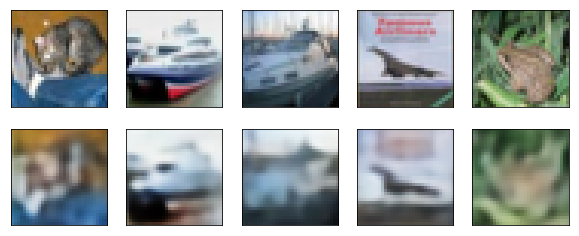

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, 5, i+1+5)
    plt.imshow(pred_train[i].reshape(32,32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [16]:
autoencoder.model.save('cifar-autoencoder-model.h5')
autoencoder.encoder_model.save('cifar-autoencoder-encoder-model.h5')
print "Saved!"

Saved!
